# 앙상블 방법

In [ ]:
#공통 모듈 임포트
import numpy as np
import os

#노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

#깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

## 투표 기반 분류기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf=SVC(gamma="scale",random_state=42)

voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard'
)

In [ ]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


간접 투표

In [ ]:
log_clf=LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf=SVC(gamma="scale",probability=True,random_state=42)

voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='soft'
)
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## 배깅과 페이스팅

### 사이킷런의 배깅과 페이스팅

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42),n_estimators=500,
    max_samples=100,bootstrap=True,random_state=42
)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.904


In [ ]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_tree))

0.856


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[-1.5,2.45,-1,1.5],alpha=0.5,contour=True):
  x1s=np.linspace(axes[0],axes[1],100)
  x2s=np.linspace(axes[2],axes[3],100)
  x1,x2=np.meshgrid(x1s,x2s)
  X_new=np.c_[x1.ravel(),x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)
  custom_cmap=ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
  if contour:
    custom_cmap2=ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
  plt.plot(X[:,0][y==0],X[:,1][y==0],"yo",alpha=alpha)
  plt.plot(X[:,0][y==1],X[:,1][y==1],"bs",alpha=alpha)
  plt.axis(axes)
  plt.xlabel(r"$x_1$",fontsize=18)
  plt.ylabel(r"$x_2$",fontsize=18,rotation=0)

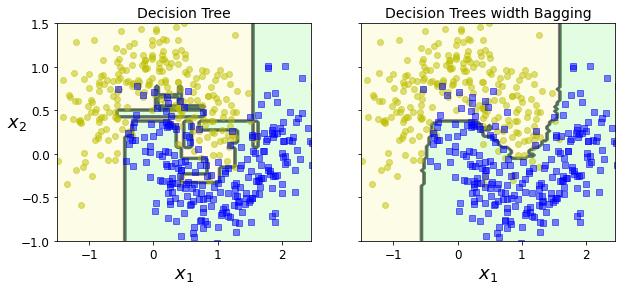

In [ ]:
fix,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf,X,y)
plt.title("Decision Tree",fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf,X,y)
plt.title("Decision Trees width Bagging",fontsize=14)
plt.ylabel("")
plt.show()

### oob 평가

In [ ]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42),n_estimators=500,
    bootstrap=True,oob_score=True,random_state=40
)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9013333333333333

In [ ]:
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

## 랜덤 포레스트

In [ ]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16,random_state=42),
    n_estimators=500,max_samples=1.0,bootstrap=True,random_state=42
)

In [ ]:
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,random_state=42)
rnd_clf.fit(X_train,y_train)

y_pred_rf=rnd_clf.predict(X_test)

In [ ]:
np.sum(y_pred==y_pred_rf)/len(y_pred) #거의 예측이 동일

0.952

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
  print(name,score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [ ]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

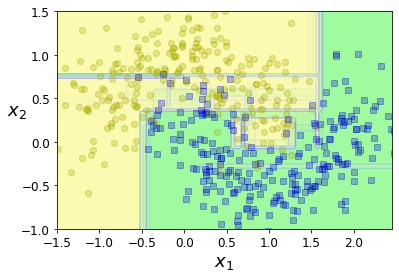

In [ ]:
plt.figure(figsize=(6,4))

for i in range(15):
  tree_clf=DecisionTreeClassifier(max_leaf_nodes=16,random_state=42+i)
  indicies_with_replacement=np.random.randint(0,len(X_train),len(X_train))
  tree_clf.fit(X[indicies_with_replacement],y[indicies_with_replacement])
  plot_decision_boundary(tree_clf,X,y,axes=[-1.5,2.45,-1,1.5],alpha=0.02,contour=False)

plt.show()

### 특성 중요도

In [ ]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',version=1)
mnist.target=mnist.target.astype(np.uint8)

In [ ]:
rnd_clf=RandomForestClassifier(n_estimators=100,random_state=42)
rnd_clf.fit(mnist["data"],mnist["target"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
def plot_digit(data):
  image=data.reshape(28,28)
  plt.imshow(image,cmap=mpl.cm.hot,interpolation="nearest")
  plt.axis("off")

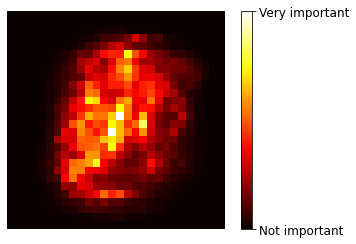

In [ ]:
plot_digit(rnd_clf.feature_importances_)

cbar=plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important','Very important'])

plt.show()

## 부스팅

### 에이다부스트

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,
    algorithm="SAMME.R",learning_rate=0.5,random_state=42
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

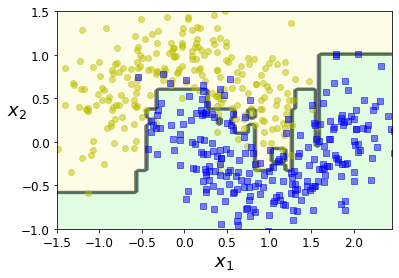

In [ ]:
plot_decision_boundary(ada_clf,X,y)

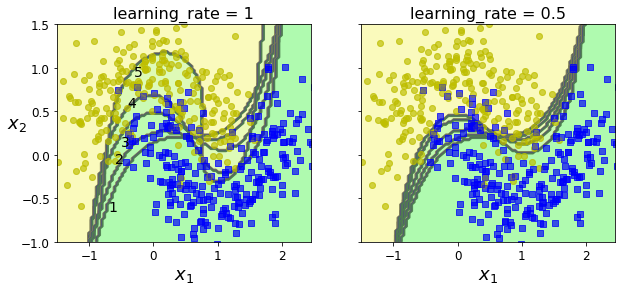

In [ ]:
m=len(X_train)

fix,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)
for subplot,learning_rate in ((0,1),(1,0.5)):
  sample_weights=np.ones(m)
  plt.sca(axes[subplot])
  for i in range(5):
    svm_clf=SVC(kernel="rbf",C=0.05,gamma="scale",random_state=42)
    svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
    y_pred=svm_clf.predict(X_train)
    sample_weights[y_pred!=y_train]*=(1+learning_rate)
    plot_decision_boundary(svm_clf,X,y,alpha=0.2)
    plt.title("learning_rate = {}".format(learning_rate),fontsize=16)
  if subplot==0:
    plt.text(-0.7,-0.65,"1",fontsize=14)
    plt.text(-0.6,-0.10,"2",fontsize=14)
    plt.text(-0.5,0.10,"3",fontsize=14)
    plt.text(-0.4,0.55,"4",fontsize=14)
    plt.text(-0.3,0.90,"5",fontsize=14)
  else:
    plt.ylabel("")

plt.show()

In [ ]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

### 그레이디언트 부스팅

In [ ]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y3=y2-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
X_new=np.array([[0.8]])

In [ ]:
y_pred=sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [ ]:
y_pred

array([0.75026781])

In [ ]:
def plot_predictions(regressors,X,y,axes,label=None,style="r-",data_style="b.",data_label=None):
  x1=np.linspace(axes[0],axes[1],500)
  y_pred=sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
  plt.plot(X[:,0],y,data_style,label=data_label)
  plt.plot(x1,y_pred,style,linewidth=2,label=label)
  if label or data_label:
    plt.legend(loc="upper center",fontsize=16)
  plt.axis(axes)

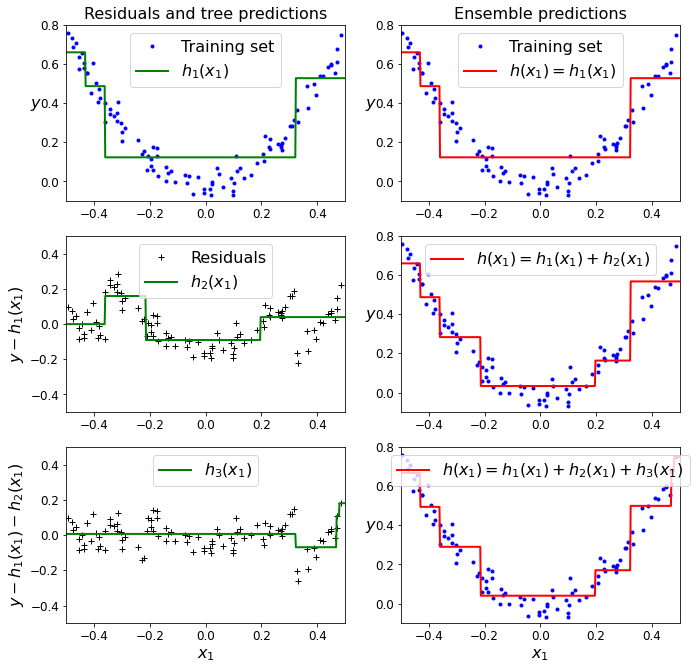

In [ ]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h_1(x_1)$",style="g-",data_label="Training set")
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.title("Residuals and tree predictions",fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h(x_1)=h_1(x_1)$",data_label="Training set")
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.title("Ensemble predictions",fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2],X,y2,axes=[-0.5,0.5,-0.5,0.5],label="$h_2(x_1)$",style="g-",data_style="k+",data_label="Residuals")
plt.ylabel("$y-h_1(x_1)$",fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1,tree_reg2],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h(x_1)=h_1(x_1)+h_2(x_1)$")
plt.ylabel("$y$",fontsize=16,rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3],X,y3,axes=[-0.5,0.5,-0.5,0.5],label="$h_3(x_1)$",style="g-",data_style="k+")
plt.ylabel("$y-h_1(x_1)-h_2(x_1)$",fontsize=16)
plt.xlabel("$x_1$",fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1,tree_reg2,tree_reg3],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$")
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("$y$",fontsize=16,rotation=0)

plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0,random_state=42)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbrt_slow=GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.1,random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

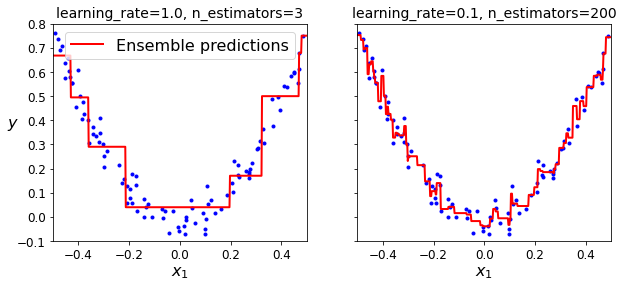

In [ ]:
fix,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt],X,y,axes=[-0.5,0.5,-0.1,0.8],label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate,gbrt.n_estimators),fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("$y$",fontsize=16,rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate,gbrt_slow.n_estimators),fontsize=14)
plt.xlabel("$x_1$",fontsize=16)

plt.show()

조기 종료를 사용한 그래이디언트 부스팅

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=49)

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=120,random_state=42)
gbrt.fit(X_train,y_train)

errors=[mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators=np.argmin(errors)+1

gbrt_best=GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators,random_state=42)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=56,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
min_error=np.min(errors)

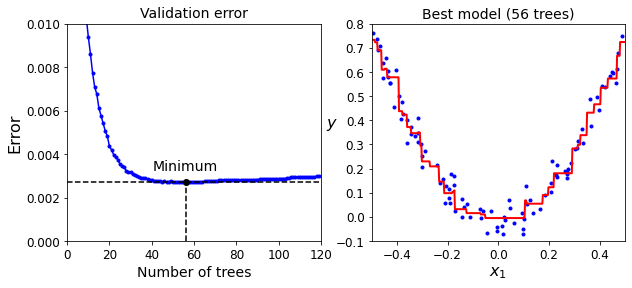

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(errors,"b.-")
plt.plot([bst_n_estimators,bst_n_estimators],[0,min_error],"k--")
plt.plot([0,120],[min_error,min_error],"k--")
plt.plot(bst_n_estimators,min_error,"ko")
plt.text(bst_n_estimators,min_error*1.2,"Minimum",ha="center",fontsize=14)
plt.axis([0,120,0,0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error",fontsize=16)
plt.title("Validation error",fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title("Best model (%d trees)"%bst_n_estimators,fontsize=14)
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.xlabel("$x_1$",fontsize=16)

plt.show()

In [ ]:
gbrt=GradientBoostingRegressor(max_depth=2,warm_start=True,random_state=42)

min_val_error=float("inf")
error_going_up=0
for n_estimators in range(1,120):
  gbrt.n_estimators=n_estimators
  gbrt.fit(X_train,y_train)
  y_pred=gbrt.predict(X_val)
  val_error=mean_squared_error(y_val,y_pred)
  if val_error<min_val_error:
    min_val_error=val_error
    error_going_up=0
  else:
    error_going_up+=1
    if error_going_up==5:
      break #early stopping

In [ ]:
print(gbrt.n_estimators_)

61


In [ ]:
print("Minimum validation MSE:",min_val_error)

Minimum validation MSE: 0.002712853325235463


XGBoost 사용하기

In [ ]:
import xgboost

In [ ]:
xgb_reg=xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train,y_train)
y_pred=xgb_reg.predict(X_val)
val_error=mean_squared_error(y_val,y_pred)
print("Validation MSE:",val_error)

[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.0028512559726563943


In [ ]:
xgb_reg.fit(X_train,y_train,eval_set=[(X_val,y_val)],early_stopping_rounds=2)
y_pred=xgb_reg.predict(X_val)
val_error=mean_squared_error(y_val,y_pred)
print("Validation MSE:",val_error)

[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.286719
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.258221
[2]	validation_0-rmse:0.232634
[3]	validation_0-rmse:0.210526
[4]	validation_0-rmse:0.190232
[5]	validation_0-rmse:0.172196
[6]	validation_0-rmse:0.156394
[7]	validation_0-rmse:0.142241
[8]	validation_0-rmse:0.129789
[9]	validation_0-rmse:0.118752
[10]	validation_0-rmse:0.108388
[11]	validation_0-rmse:0.100155
[12]	validation_0-rmse:0.09208
[13]	validation_0-rmse:0.084791
[14]	validation_0-rmse:0.078699
[15]	validation_0-rmse:0.073248
[16]	validation_0-rmse:0.069391
[17]	validation_0-rmse:0.066277
[18]	validation_0-rmse:0.063458
[19]	validation_0-rmse:0.060326
[20]	validation_0-rmse:0.0578
[21]	validation_0-rmse:0.055643
[22]	validation_0-rmse:0.053943
[23]	validation_0-rmse:0.053138
[24]	validation_0-rmse:0.052415
[25]	validation_0-rmse

In [ ]:
%timeit xgboost.XGBRegressor().fit(X_train,y_train) if xgboost is not None else None

[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
%timeit GradientBoostingRegressor().fit(X_train,y_train)

10 loops, best of 3: 24.3 ms per loop
